In [83]:
#imports
from sklearn import datasets as ds
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
import matplotlib.pyplot as plt
import numpy as np

In [84]:
#Generate 2 classes dataset
X, y = ds.make_classification(n_samples=1000, n_classes=2, random_state=0)


In [85]:
#split training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [86]:
#model
model = LogisticRegression(solver='lbfgs', random_state=42)

#fit
model.fit(X_train, y_train)

#performance
pred_prob = model.predict_proba(X_test)
pred_prob = pred_prob[:,1]

In [87]:
pred_prob

array([9.99138529e-01, 4.23940250e-02, 9.59030949e-01, 5.99209138e-02,
       6.14075985e-02, 9.98480232e-01, 1.22237684e-03, 9.99772222e-01,
       2.66768476e-03, 8.83729515e-01, 1.61325311e-01, 9.54271412e-01,
       1.52020168e-01, 3.10809820e-03, 2.38846365e-01, 8.70610367e-02,
       8.61977006e-01, 1.80816174e-02, 5.45951996e-02, 9.51469716e-01,
       1.62529264e-02, 1.04325348e-02, 1.86067289e-02, 1.59295815e-01,
       9.65499378e-01, 2.01282452e-01, 7.95908450e-01, 9.99337412e-01,
       8.06489465e-02, 9.87466790e-01, 5.03254774e-02, 5.11518445e-03,
       9.99685976e-01, 9.74268005e-01, 5.23495828e-01, 3.83129708e-02,
       5.99732166e-02, 1.83844191e-01, 9.98926259e-01, 7.65927502e-02,
       8.67695252e-03, 9.78493356e-01, 8.91906827e-01, 6.90206316e-03,
       1.43145347e-02, 9.93034236e-01, 9.99995572e-01, 6.45177725e-01,
       5.59850683e-02, 1.41806807e-02, 2.57068315e-02, 9.99047232e-01,
       9.98347059e-01, 3.54057932e-03, 9.66084488e-01, 9.91044528e-01,
      

In [88]:
y_test

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1])

In [89]:
#roc curve
fpr, tpr, thresholds = mt.roc_curve(y_test, pred_prob)

Text(0.5, 1.0, 'FPR x TPR')

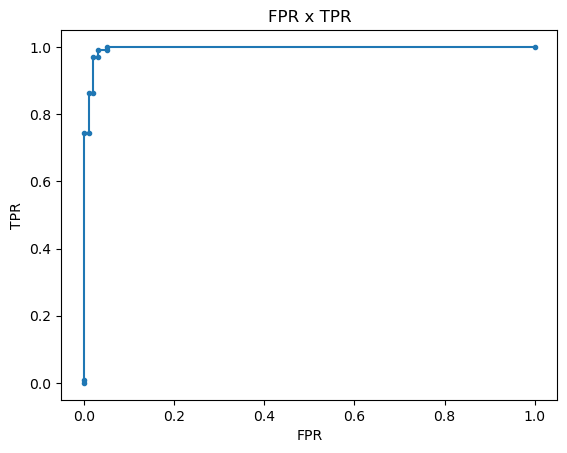

In [90]:
plt.plot(fpr, tpr, marker='.')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("FPR x TPR")

In [91]:
# Exemplo: fpr, tpr e thresholds já calculados pela roc_curve
# fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Calcula a distância de cada ponto ao ideal (0,1)
distances = np.sqrt((fpr - 0)**2 + (tpr - 1)**2)

# Encontra o índice do menor valor (ponto mais próximo de (0, 1))
best_index = np.argmin(distances)

# Obtém o threshold correspondente
best_threshold = thresholds[best_index]

print(f"O melhor threshold é: {best_threshold}")

O melhor threshold é: 0.29374232205572254


C:\Users\Luigi\AppData\Local\Temp\ipykernel_32552\2403497288.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(thresholds, tpr, 'b--', label='True Posite Rate', color='r' )


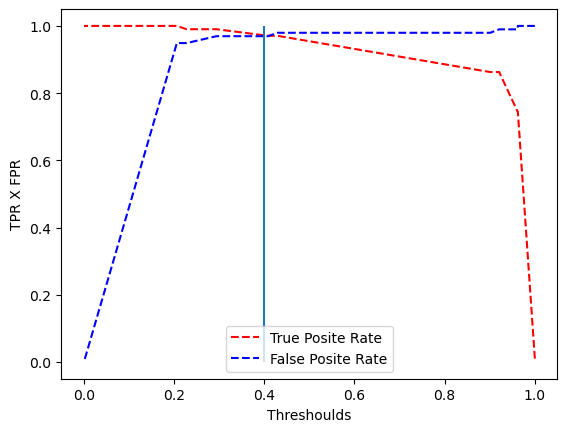

In [92]:
# Faz com que o true posite rate seja maximo e o false posite rate seja minimo, encontrando assim o threshold-0.5
plt.plot(thresholds, tpr, 'b--', label='True Posite Rate', color='r' )
plt.plot(thresholds, 1-fpr, 'b--', label='False Posite Rate')
plt.xlabel('Threshoulds')
plt.ylabel('TPR X FPR')
plt.vlines(0.40, 0, 1)
plt.legend()

In [93]:
pred_prob

array([9.99138529e-01, 4.23940250e-02, 9.59030949e-01, 5.99209138e-02,
       6.14075985e-02, 9.98480232e-01, 1.22237684e-03, 9.99772222e-01,
       2.66768476e-03, 8.83729515e-01, 1.61325311e-01, 9.54271412e-01,
       1.52020168e-01, 3.10809820e-03, 2.38846365e-01, 8.70610367e-02,
       8.61977006e-01, 1.80816174e-02, 5.45951996e-02, 9.51469716e-01,
       1.62529264e-02, 1.04325348e-02, 1.86067289e-02, 1.59295815e-01,
       9.65499378e-01, 2.01282452e-01, 7.95908450e-01, 9.99337412e-01,
       8.06489465e-02, 9.87466790e-01, 5.03254774e-02, 5.11518445e-03,
       9.99685976e-01, 9.74268005e-01, 5.23495828e-01, 3.83129708e-02,
       5.99732166e-02, 1.83844191e-01, 9.98926259e-01, 7.65927502e-02,
       8.67695252e-03, 9.78493356e-01, 8.91906827e-01, 6.90206316e-03,
       1.43145347e-02, 9.93034236e-01, 9.99995572e-01, 6.45177725e-01,
       5.59850683e-02, 1.41806807e-02, 2.57068315e-02, 9.99047232e-01,
       9.98347059e-01, 3.54057932e-03, 9.66084488e-01, 9.91044528e-01,
      

In [94]:
th = 0.52
pred_prob = [1 if x > th else 0 for x in pred_prob]
pred_prob

[1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1]